# Import des outils / jeu de données

In [7]:
import sys

In [9]:
a = sys.path[0]

In [14]:
sys.path.append(a.replace("src/notebooks", ""))

In [15]:
sys.path

['/home/ab2/Documents/GitHub/ab2/kickstarter-project-analysis/src/notebooks',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/ab2/.cache/pypoetry/virtualenvs/kickstarter-project-analysis-vTp_nxZk-py3.10/lib/python3.10/site-packages',
 '/home/ab2/Documents/GitHub/ab2/kickstarter-project-analysis/src/',
 '/home/ab2/Documents/GitHub/ab2/kickstarter-project-analysis/']

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

from src.modelisation.univariate.non_parametric.models import create_survival_models
from src.modelisation.univariate.parametric.models import create_models
from src.modelisation.univariate.parametric.plot import (
    plot_hazard_estimation,
    plot_hazard_estimations,
    plot_survival_estimation,
    plot_survival_estimations,
)
from src.utils import init_notebook

In [19]:
init_notebook()

# Données

In [20]:
df = pd.read_csv(
    "data/kickstarter_1.csv",
    parse_dates=True,
)

In [21]:
event_times = df["day_succ"]
event_observed = df["Status"]

event_times_no_censoring = df["day_succ"][df["Status"] == 1]
event_observed_no_censoring = df["Status"][df["Status"] == 1]
df_video = df[df["has_video"] == 1].copy()
df_no_video = df[df["has_video"] == 0].copy()

t_video = df_video["day_succ"]
o_video = df_video["Status"]

t_no_video = df_no_video["day_succ"]
o_no_video = df_no_video["Status"]

In [22]:
models = create_models()

# Tests

In [29]:
from lifelines.statistics import logrank_test
results = logrank_test(t_no_video, t_video, event_observed_A=o_no_video, event_observed_B=o_video)

results.print_summary(decimals=4)
print(f"{results.p_value = }")   
print(f"{results.test_statistic = }") 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          71.85 <0.005     55.26

results.p_value = 2.3194959457246772e-17
results.test_statistic = 71.85207408642154


In [32]:
from lifelines.statistics import logrank_test
results = logrank_test(event_times, t_video, event_observed_A=event_observed, event_observed_B=o_video)

results.print_summary(decimals=4)
print(f"{results.p_value = }")        
print(f"{results.test_statistic = }") 

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.83 0.01      7.60

results.p_value = 0.005139259909134465
results.test_statistic = 7.829771399830676


# Fonction de survie

## Modèles paramétriques

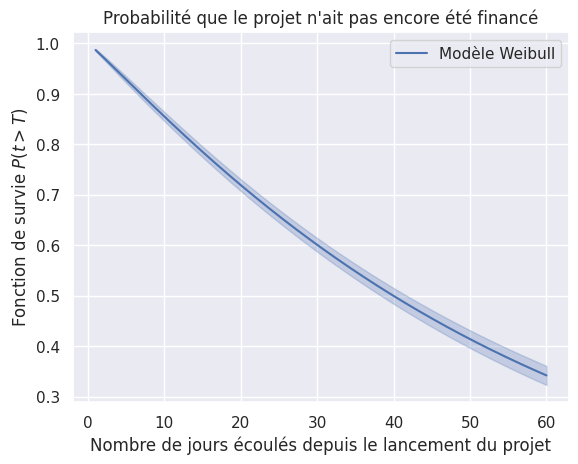

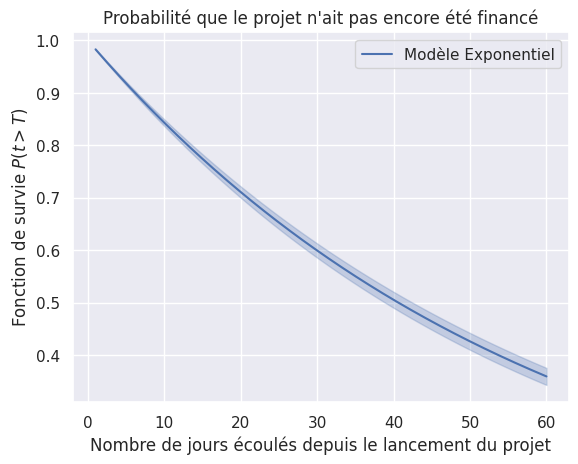

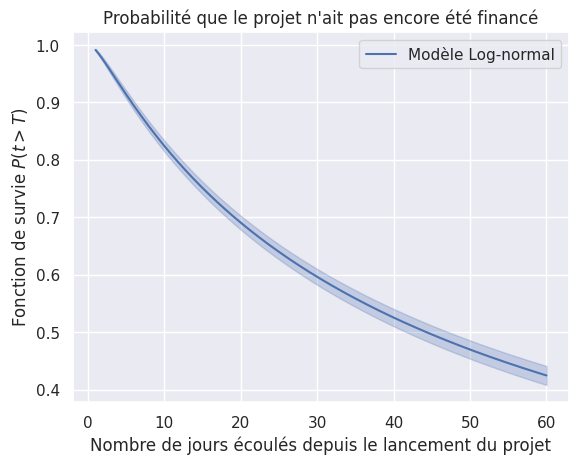

In [ ]:
plot_survival_estimations(models, event_times, event_observed)

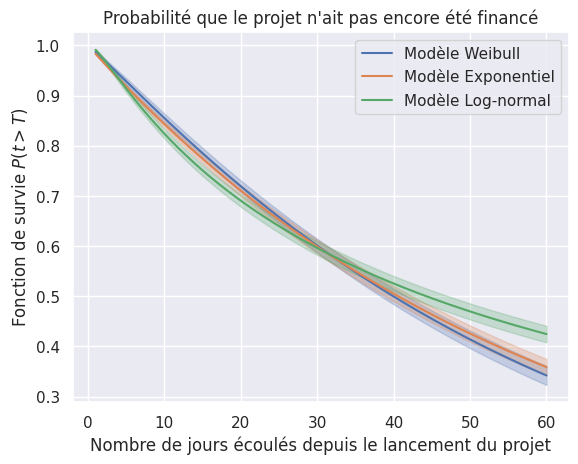

In [ ]:
plot_survival_estimations(models, event_times, event_observed, same_plot=True)

## Impact de la censure

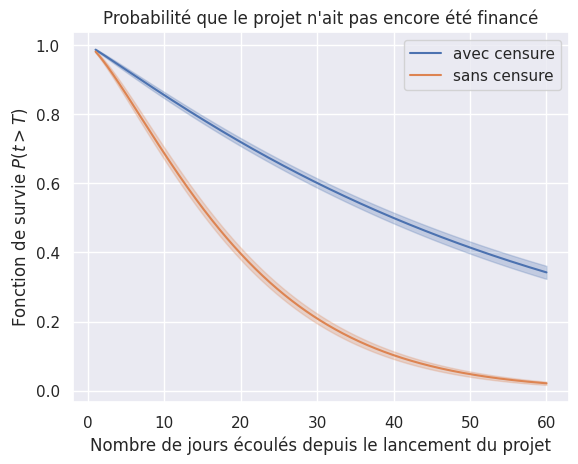

In [ ]:
plot_survival_estimation(models["Weibull"], event_times, event_observed, "avec censure")
plot_survival_estimation(
    models["Weibull"],
    event_times_no_censoring,
    event_observed_no_censoring,
    "sans censure",
)

## Comparaison avec modèles non-paramétriques

In [ ]:
km = create_survival_models()["Kaplan-Meier"]

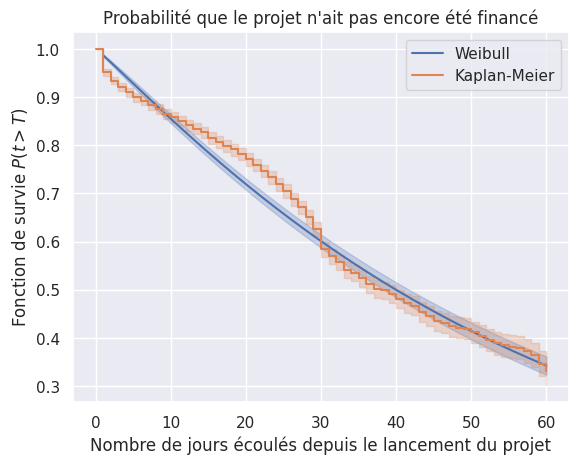

In [ ]:
plot_survival_estimation(models["Weibull"], event_times, event_observed, "Weibull")
plot_survival_estimation(km, event_times, event_observed, "Kaplan-Meier")

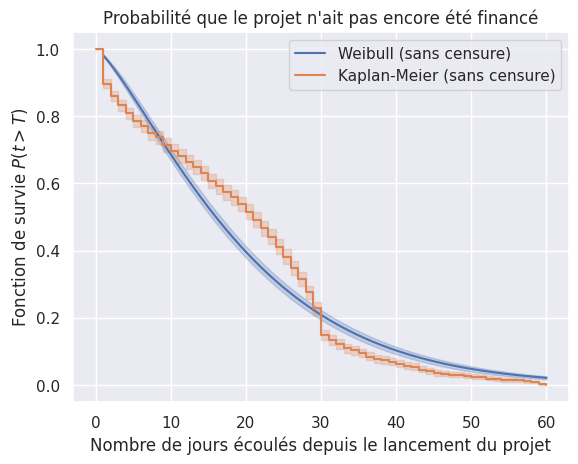

In [ ]:
plot_survival_estimation(
    models["Weibull"],
    event_times_no_censoring,
    event_observed_no_censoring,
    "Weibull (sans censure)",
)
plot_survival_estimation(
    km,
    event_times_no_censoring,
    event_observed_no_censoring,
    "Kaplan-Meier (sans censure)",
)

## Co-variables

### Vidéo de présentation

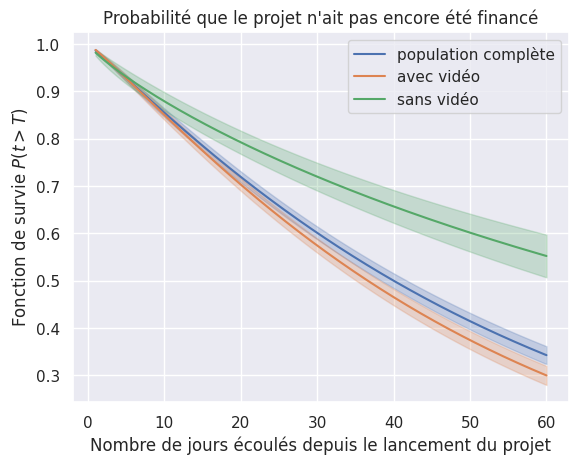

In [ ]:
plot_survival_estimation(
    models["Weibull"], event_times, event_observed, "population complète"
)
plot_survival_estimation(models["Weibull"], t_video, o_video, "avec vidéo")
plot_survival_estimation(models["Weibull"], t_no_video, o_no_video, "sans vidéo")

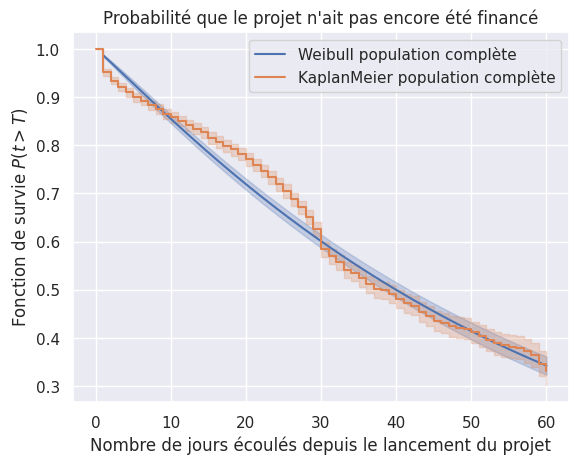

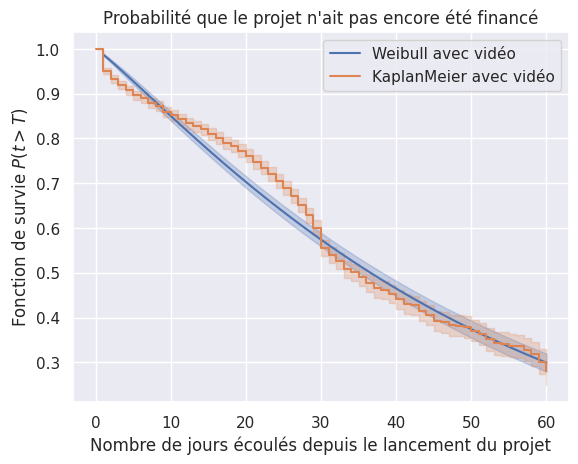

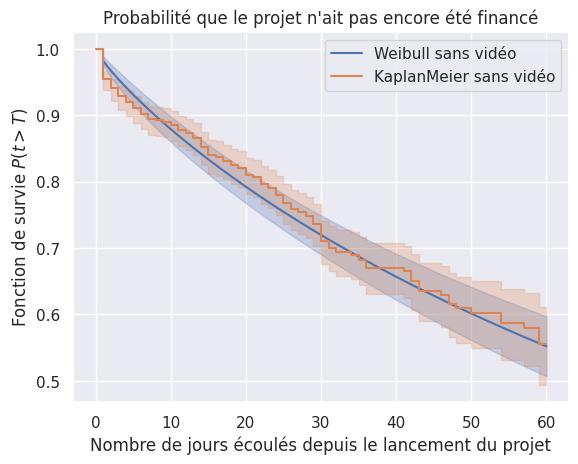

In [ ]:
for model in (models["Weibull"], km):
    name = model.__class__.__name__.replace("Fitter", "")
    plot_survival_estimation(
        model, event_times, event_observed, f"{name} population complète"
    )
plt.show()
for model in (models["Weibull"], km):
    name = model.__class__.__name__.replace("Fitter", "")
    plot_survival_estimation(model, t_video, o_video, f"{name} avec vidéo")


plt.show()
for model in (models["Weibull"], km):
    name = model.__class__.__name__.replace("Fitter", "")
    plot_survival_estimation(model, t_no_video, o_no_video, f"{name} sans vidéo")

# Fonction de risque

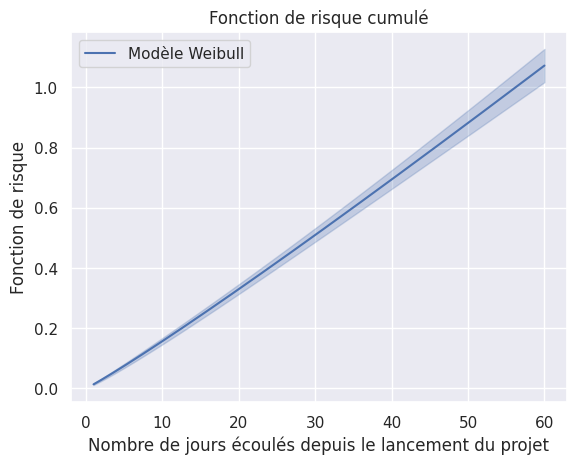

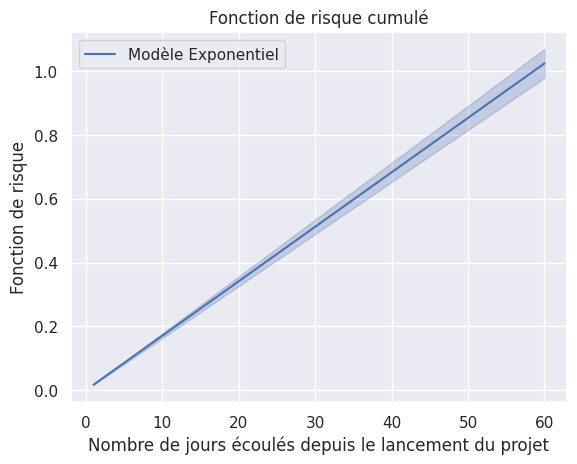

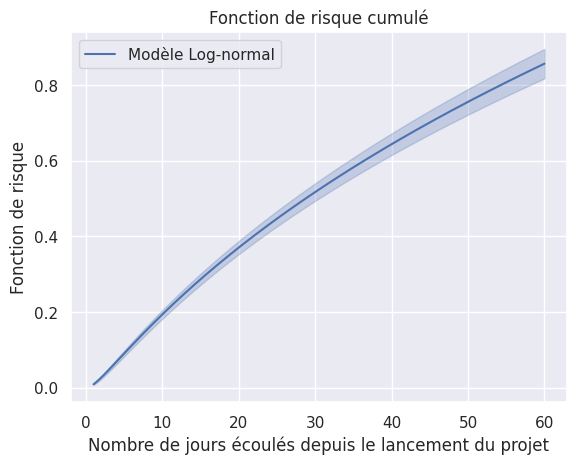

In [ ]:
plot_hazard_estimations(models, event_times, event_observed)

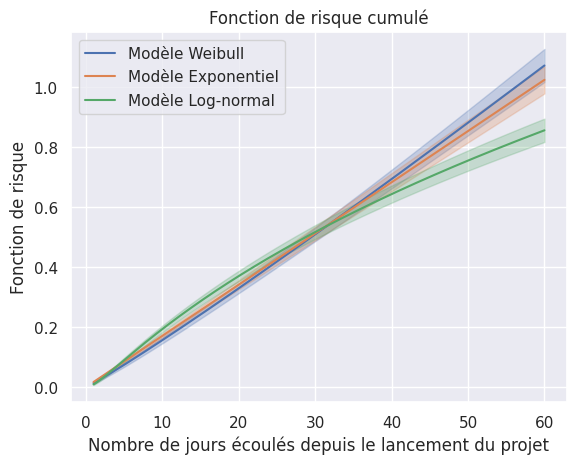

In [ ]:
plot_hazard_estimations(models, event_times, event_observed, same_plot=True)

## Impact de la censure

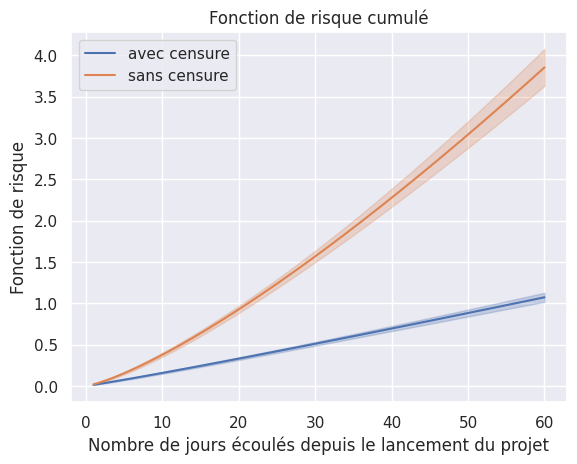

In [ ]:
plot_hazard_estimation(models["Weibull"], event_times, event_observed, "avec censure")
plot_hazard_estimation(
    models["Weibull"],
    event_times_no_censoring,
    event_observed_no_censoring,
    "sans censure",
)

## Co-variables

### Vidéo de présentation

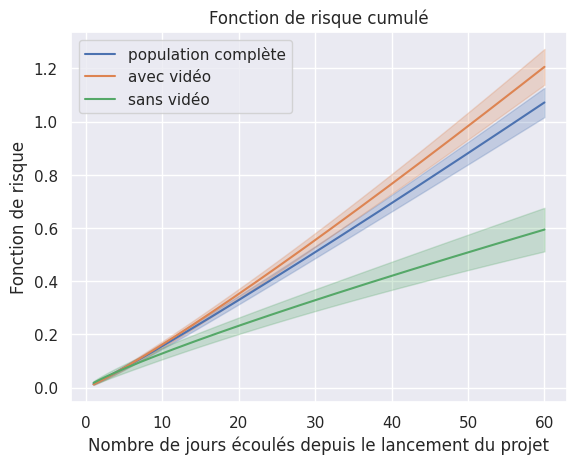

In [ ]:
plot_hazard_estimation(
    models["Weibull"], event_times, event_observed, "population complète"
)
plot_hazard_estimation(models["Weibull"], t_video, o_video, "avec vidéo")
plot_hazard_estimation(models["Weibull"], t_no_video, o_no_video, "sans vidéo")